## Russian Twitter trolls in Canada

This is the analysis code. It assumes you downloaded the source data files from FiveThirtyEight. See the README for details.

Import libraries and set display options

In [1]:
import pandas as pd
import numpy as np
import glob

pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 200)

Import CSV files from FiveThirtyEight into one data frame

In [4]:
all_files = []

csvs = glob.glob('*.csv')
for csv in csvs:
    temp = pd.read_csv(csv, dtype={'external_author_id':str}, parse_dates=[5,6])
    all_files.append(temp)

df = pd.concat(all_files)
del all_files
df.head()

/Users/beto/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,account_category,account_type,author,clean_tweet,content,external_author_id,followers,following,harvested_date,language,new_june_2018,post_type,publish_date,region,retweet,updates
0,RightTroll,Right,10_GOP,NaN,"""We have a sitting Democrat US Senator on trial for corruption and you've barely heard a peep from the mainstream media."" ~ @nedryun https://t.co/gh6g0D1oiC",9.06000000000e+17,9636,1052,2017-10-01 19:59:00,English,0,NaN,2017-10-01 19:58:00,Unknown,0,253
1,RightTroll,Right,10_GOP,NaN,Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ,9.06000000000e+17,9637,1054,2017-10-01 22:43:00,English,0,NaN,2017-10-01 22:43:00,Unknown,0,254
2,RightTroll,Right,10_GOP,NaN,"Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear. #BoycottNFL https://t.co/qDlFBGMeag",9.06000000000e+17,9637,1054,2017-10-01 22:51:00,English,0,RETWEET,2017-10-01 22:50:00,Unknown,1,255
3,RightTroll,Right,10_GOP,NaN,"JUST IN: President Trump dedicates Presidents Cup golf tournament trophy to the people of Florida, Texas and Puerto Rico. https://t.co/z9wVa4djAE",9.06000000000e+17,9642,1062,2017-10-01 23:52:00,English,0,NaN,2017-10-01 23:52:00,Unknown,0,256
4,RightTroll,Right,10_GOP,NaN,"19,000 RESPECTING our National Anthem! #StandForOurAnthem🇺🇸 https://t.co/czutyGaMQV",9.06000000000e+17,9645,1050,2017-10-01 02:13:00,English,0,RETWEET,2017-10-01 02:13:00,Unknown,1,246


In [5]:
# Save as pickle for faster loading next time

df.to_pickle('russian_tweets_pickle')

In [4]:
# List of keywords to isolate Canada-spacific tweets

can_words = ['canada', 'canadian', 'trudeau', 'justintrudeau', 'toronto', 'montreal', 'vancouver', 'ottawa', 'onpoli', 'polqc', 'cdnpoli',
             'canuck', '\Wndp\W', 'scheer', 'thejagmeetsingh', 'jagmeet singh', 'topoli', 'quebec', 'qcpoli',
             'halifax', 'edmonton', 'calgary', 'alberta', 'ontario', 'winnipeg', 'manitoba', 'saskatchewan', 'british columbia',
            'ezra ?levant', 'therebeltv', 'rob ford', 'doug ford', 'fordnation', 'la meute', 'alexandre bissonnette',
            'atalante', 'zeiger', 'alek minassian', 'chrystia freeland', 'cafreeland', 'kathleen[ _]wynne', 
            '\Wcbc\W', 'cbcnews', 'ctvnews', 'globe ?and ?mail', 'postmedia', 'keystone ?xl', 'kinder ?morgan', 'trans ?mountain',
            'colten ?boushie', 'boushie', 'settlecollector', 'justiceforcolten', 'oil ?sands', 'ableg', 'bcpoli', 'energy ?east' ]

In [ ]:
# Make a regular expression pattern with the word list and search the tweets for them

can_regex = '(' + '|'.join(can_words) + ')'

df = df[df.content.notna()]
cantwt = df[df.content.str.contains(can_regex, case=False)]

# Drop duplicates in case
cantwt = cantwt.drop_duplicates(['author', 'content', 'publish_date', 'harvested_date', 'account_type'])
cantwt.shape

In [38]:
# Save Canadian tweet list as pickle

cantwt.to_pickle('troll_tweets_canada_pickle')

In [23]:
# How many tweets mention the keywords in the list

for word in can_words:
    print(word, len(cantwt[cantwt.content.str.contains(word, case=False)]))

canada 2992
canadian 1701
trudeau 838
justintrudeau 130
toronto 674
montreal 236
vancouver 187
ottawa 122
onpoli 109
polqc 7
cdnpoli 173
canuck 143
\Wndp\W 25
scheer 34
thejagmeetsingh 1
jagmeet singh 0
topoli 23
quebec 184
qcpoli 1
halifax 23
edmonton 55
calgary 72
alberta 190
ontario 161
winnipeg 43
manitoba 16
saskatchewan 28
british columbia 25
ezra ?levant 24
therebeltv 25
rob ford 19
doug ford 0
fordnation 0
la meute 0
alexandre bissonnette 3
atalante 0
zeiger 10
alek minassian 0
chrystia freeland 1
cafreeland 0
kathleen[ _]wynne 10
\Wcbc\W 82
cbcnews 12
ctvnews 122
globe ?and ?mail 39
postmedia 10
keystone ?xl 171
kinder ?morgan 13
trans ?mountain 5
colten ?boushie 0
boushie 0
settlecollector 0
justiceforcolten 0
oil ?sands 43
ableg 93
bcpoli 99
energy ?east 2


In [66]:
# See a sample of tweets that mention Syria

cantwt[cantwt.content.str.contains('anthem', case=False)].sample(10)

,account_category,account_type,author,clean_tweet,content,external_author_id,followers,following,harvested_date,language,new_june_2018,post_type,publish_date,region,retweet,updates
217535,RightTroll,Right,CHIRRISMOGUI,The Canadian Football League is Protesting THEIR OWN National Anthem!,The Canadian Football League is Protesting THEIR OWN National Anthem! https://t.co/Z3TJIO0i9u,8.98000000000e+17,2187,4804,2017-09-25 21:06:00,English,0,NaN,2017-09-25 21:06:00,United States,0,1388
234263,RightTroll,Right,PAOLAKINCK,Shameless.... (Canada) Muslim Delegation Refuses to Stand for National Anthem at School Board Meeting,Shameless.... (Canada) Muslim Delegation Refuses to Stand for National Anthem at School Board Meeting https://t.co/7v6Yk0Ba1W,2535166748,2168,2929,2016-11-28 11:34:00,English,0,RETWEET,2016-11-28 11:34:00,United States,1,3859
61770,RightTroll,Right,BRRISTASI,Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem,Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem https://t.co/pkSJsvB2Fn,8.98000000000e+17,1551,4761,2017-09-27 17:40:00,English,0,NaN,2017-09-27 17:39:00,Unknown,0,1433
140434,RightTroll,Right,CELLESTINS,The Canadian Football League is Protesting THEIR OWN National Anthem!,The Canadian Football League is Protesting THEIR OWN National Anthem! https://t.co/UyscTxlcnt,8.98000000000e+17,1439,4761,2017-09-25 21:02:00,English,0,NaN,2017-09-25 21:02:00,Unknown,0,1370
56103,RightTroll,Right,BRISSTOFLR,The Canadian Football League is Protesting THEIR OWN National Anthem!,The Canadian Football League is Protesting THEIR OWN National Anthem! https://t.co/qDf3tL78QR,8.98000000000e+17,996,4728,2017-09-25 21:05:00,English,0,NaN,2017-09-25 21:05:00,United States,0,1387
226373,RightTroll,Right,EVANNGHARTR,Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem,Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem https://t.co/eZf4ijRAbH https://t.co/g1vszbNl22,8.91000000000e+17,2740,4777,2017-09-27 17:41:00,English,0,NaN,2017-09-27 17:41:00,Unknown,0,5044
396215,NewsFeed,local,DAILYSANJOSE,Miami's Dwyane Wade takes warm-up shots during Canadian national anthem,#sports Miami's Dwyane Wade takes warm-up shots during Canadian national anthem,2494112058,12803,5874,2016-05-09 16:40:00,English,1,NaN,2016-05-09 16:37:00,United States,0,17681
165921,RightTroll,Right,CHARMEESTRS,Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem,Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem https://t.co/qcLGHzbv3q,8.98000000000e+17,1873,4800,2017-09-27 17:40:00,English,0,NaN,2017-09-27 17:39:00,Unknown,0,1482
220203,RightTroll,Right,CHIRRMORRE,The Canadian Football League is Protesting THEIR OWN National Anthem!,The Canadian Football League is Protesting THEIR OWN National Anthem! https://t.co/Y6yERkCs8h,8.98000000000e+17,1696,4842,2017-09-25 21:03:00,English,0,NaN,2017-09-25 21:03:00,Unknown,0,1392
61671,RightTroll,Right,BRRISTASI,The Canadian Football League is Protesting THEIR OWN National Anthem!,The Canadian Football League is Protesting THEIR OWN National Anthem! https://t.co/Y7mqtf7kB8,8.98000000000e+17,1572,4764,2017-09-25 21:04:00,English,0,NaN,2017-09-25 21:04:00,Unknown,0,1351


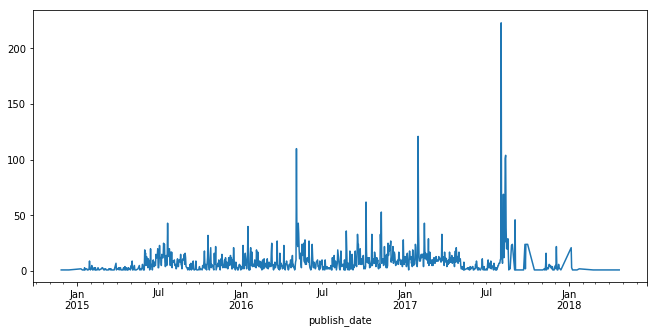

In [24]:
# Plot number of tweets per day

%matplotlib inline

by_day = cantwt.groupby(cantwt.publish_date.dt.to_period('D')).size()
by_day.plot(figsize=(11,5))

In [59]:
# Sample of tweets in top 5 days

top_days = by_day.sort_values(ascending=False).head(5).index
cantwt[cantwt.publish_date.apply(lambda x: x in top_days)].content.head(15).tolist()

["It's Rarely Sunny in Toronto But It's pretty Nice, Eh! #MakeTVShowsCanadian @midnight",
 "'@midnight #MakeTVShowsCanadian How I Met Your Mountie https://t.co/g6OvEZIbpC'",
 "Canada's Best Curling Crew  #MakeTVShowsCanadian",
 'Tiny Saskatoons #MakeTVShowsCanadian  @midnight',
 '"#MakeTVShowsCanadian beautiful voice ????????',
 'Thicke of the Night...Oh, wait....Oh.  #MakeTVShowsCanadian',
 '"Toronto Catch A Predator',
 '#abi Canada FORCED to take DRASTIC Action to Stop Illegals From Flooding In https://t.co/X3WaVllKUv #ABISS https://t.co/RuWgibVxHB',
 '#abi Why Hasn’t Chelsea Handler Moved to Canada By Now? https://t.co/aVZqRJtIkO #ABISS https://t.co/7CpFcXHzuY',
 '#acapa Canada FORCED to take DRASTIC Action to Stop Illegals From Flooding In https://t.co/FAubeg1G4e https://t.co/AYV2o1EBul',
 '#acapa Why Hasn’t Chelsea Handler Moved to Canada By Now? https://t.co/CrMuKw6EF0 https://t.co/tzDBfOSZNw',
 'We suspect that Canada does not want her either. The #USFA needs patriots to help us

In [35]:
# How many unique accounts there are

len(cantwt.author.unique())

653

In [29]:
# How many tweets were retweets or quotes

cantwt.post_type.value_counts()

RETWEET        3273
QUOTE_TWEET      83
Name: post_type, dtype: int64

In [26]:
# Account category counts

cantwt.account_category.value_counts()

RightTroll      2696
NewsFeed        2315
LeftTroll       1234
HashtagGamer     889
Commercial       406
NonEnglish       235
Unknown           28
Fearmonger         6
Name: account_category, dtype: int64

In [54]:
# Top accounts and their types

(cantwt[cantwt.author.isin(top_accounts.index)]
 .groupby(['author', 'account_category'])
 .size()
 .sort_values(ascending=False)
)

author           account_category
ROOMOFRUMOR      NewsFeed            504
SPECIALAFFAIR    NewsFeed            356
SCREAMYMONKEY    NewsFeed            345
AMELIEBALDWIN    RightTroll          271
SEATTLE_POST     NewsFeed            238
EXQUOTE          Commercial          189
WORLDNEWSPOLI    RightTroll          186
COVFEFENATIONUS  RightTroll          105
WORLDOFHASHTAGS  HashtagGamer         86
CHESPLAYSCHESS   RightTroll           84
JENN_ABRAMS      RightTroll           81
FINDDIET         Commercial           80
KANSASDAILYNEWS  NewsFeed             74
TODAYPITTSBURGH  NewsFeed             73
DAILYSANFRAN     NewsFeed             70
dtype: int64

In [28]:
# Average stats on these top accounts

cantwt[cantwt.author.isin(top_accounts.index)].groupby('author').mean()

,followers,following,new_june_2018,retweet,updates
author,,,,,
AMELIEBALDWIN,2565.549815,2141.472325,0.0,0.970480,23547.332103
CHESPLAYSCHESS,679.642857,568.595238,0.0,0.988095,12036.797619
COVFEFENATIONUS,2396.685714,247.980952,1.0,0.933333,153610.485714
DAILYSANFRAN,16972.457143,5817.400000,0.0,0.000000,30380.000000
EXQUOTE,471.788360,2.000000,1.0,0.000000,34596.465608
FINDDIET,197.800000,3.062500,1.0,0.275000,19742.000000
JENN_ABRAMS,44104.222222,13802.432099,0.0,0.049383,13555.580247
KANSASDAILYNEWS,24536.000000,6407.500000,0.0,0.000000,37248.013514
ROOMOFRUMOR,12266.097222,8499.696429,1.0,0.000000,17884.686508


In [62]:
# See some tweets by the top right-wing troll

cantwt[cantwt.author == 'AMELIEBALDWIN'].sample(10)[['content', 'publish_date']]

,content,publish_date
118371,"But, per #Obama, sanctions don't work. Huh, #Iran. Canada Announces Sanctions Against Syrian Gov't https://t.co/RgoiouuvYV via @dailycaller",2017-04-16 02:38:00
104850,"#trudeaueulogies ""I'm very sorry to see the passing of Dr. Mengele. Science has lost a great pioneer""",2016-11-27 01:27:00
119052,"Pte. Henry Houston Mccullough (Canadian Infantry - Eastern Ontario Regiment). Aug. 8, 1918. Age: 22",2017-04-20 04:23:00
112514,".@NRDC’s “Canada expert” needs help on geography, science, composition, accountability: https://t.co/hnMiqm0kwy https://t.co/84JJb3FVpC",2017-02-27 01:40:00
119928,Toronto Sun Columnist on ISIS Hit List for Islam Coverage Saved by Police https://t.co/Dv97rzOEUt https://t.co/DFVjoveTMe,2017-04-27 12:28:00
117159,'@_Sylvia_1 @JustinTrudeau I never thought I'd see anyone worse for this country than PET..I was wrong',2017-03-09 13:40:00
114337,Mr Trudeau why was Justin born when you could have used a sock?. @Carmenkrevenky1 @ExtremCanadian @TrudeauNeeds2Go @mack3636 https://t.co/d0ds9KxtdS,2017-03-15 23:01:00
111857,"This divide resulted in this disastrous, accidental NDP. It's time to bring the family back together! #uniteAlberta #ableg #pcldr #pcaa https://t.co/3NujP1leb2",2017-02-21 21:12:00
111662,'@ezralevant @scotsta59 they are probably illegal in the country that's why they r crossing the border hardly refugees fleeing nothing 1/',2017-02-20 17:38:00
128503,I Smell ISLAM BREAKING! CANADA: Apparent terror attack by man with machete at Calgary’s Marlborough Mall https://t.co/N865eShzsR #Chelsea,2016-09-19 19:05:00


In [65]:
# Strip tweets of hashtags, URLs and @-mentions and find 12 most tweeted texts

cantwt['clean_tweet'] = cantwt.content.str.replace('(@\w+|#\w+|https?:.+)', '').str.strip()
top_tweets = cantwt.clean_tweet.value_counts().head(12)
top_tweets

                                                                                       230
Canada FORCED to take DRASTIC Action to Stop Illegals From Flooding In                  81
Why Hasn’t Chelsea Handler Moved to Canada By Now?                                      69
Trudeau is Forced to Rethink His OPEN BORDERS Policy                                    42
BREAKING: ISIS Terrorist STABS Cop, Hits 4 Others With Car During Rampage in Canada     24
Canadian NHL Player CONSIDERING ‘Taking a Knee’ During U.S. Anthem                      24
The Canadian Football League is Protesting THEIR OWN National Anthem!                   24
By Spacy Eva                                                                            23
GITMO Terrorist Killer Trudeau Gave $10 Million to Now WANTS MORE!                      23
Trudeau Learning the Hard Way “Refugees Welcome” is Bankrupting His Country             23
Globalist Trudeau is Shamelessly DESTROYING Small Businesses!                           22

In [31]:
# Most mentioned hashtags and accounts

hashtags = cantwt.content.str.extractall('(#\w+)')
mentions = cantwt.content.str.extractall('(@\w+)')

hashtags[0].value_counts().head(20)

#news                   747
#sports                 361
#world                  295
#environment            225
#MakeTVShowsCanadian    181
#cdnpoli                162
#Canada                 117
#politics                98
#life                    60
#IfIWereTedCruz          54
#tcot                    50
#local                   49
#TopNews                 46
#health                  44
#WorldNews               43
#tech                    42
#TopVideo                41
#Toronto                 36
#hockey                  36
#Trudeau                 35
Name: 0, dtype: int64

In [32]:
mentions[0].value_counts().head(20)

@midnight           133
@CCTVNewsAfrica     118
@JustinTrudeau       89
@ABCPolitics         40
@saatchi_gallery     30
@GlennMcmillan14     29
@josephjett          29
@realDonaldTrump     29
@tarekfatah          27
@thetorontosun       27
@agotoronto          26
@VanArtGallery       26
@ArtGalleryofNSW     26
@TheAGH              22
@mmmradiocanada      20
@DJBankrupt          20
@PhenomRadio         20
@POTUS               19
@TheRebelTV          19
@YouTube             18
Name: 0, dtype: int64

In [156]:
# Run some NLP on the tweets

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

engstopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    """Utility function to convert pos_tag part-of-speech tags 
    to WordNet tags for use with lemmatizer. 
    """
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

def tokenize(text):
    """Takes raw text, tokenizes it, removes stopwords 
    and words that are one-character long (like 'a' and punctuation).
    Returns a list of tokens.
    """
    
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [word.lower() for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if word not in engstopwords]
    return tokens

def get_pos(tokens):
    """Takes a token list and gets the part-of-speech for each.
    Returns a list of tuples ('word', 'POS')
    """
    
    tagged = nltk.pos_tag(tokens)
    return tagged
  
def lemmatize(tagged_words):
    """Lemmatizes words. That is, it normalizes words to their most
    basic form. For example, 'is', 'am' and 'are' are merged into 'be'.
    
    Returns a list of lemmatized tokens.
    
    Lemmatization is confined to parts of speech. Verb variations are lemmatized
    to the root verb, and same with nouns.
    
    Example: 'continues' and 'continuing' are merged to 'continue'
    but 'continuation' stays the same.
    """
    
    lemma_list = []
    for word, tag in tagged_words:
        wntag = get_wordnet_pos(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word) 
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag)
        lemma_list.append(lemma)
    return lemma_list
  
def get_distfreq(tokens, top_n):
    """ Finds the most common words in a token list.
    Returns a list of tuples ('word', frequency)
    """
    
    fdist = nltk.FreqDist(tokens)
    return fdist.most_common(top_n)


In [180]:
# Most common words

all_tweets = ' '.join(cantwt.clean_tweet.values)

lemmas = lemmatize(get_pos(tokenize(all_tweets)))
get_distfreq(lemmas, 30)

[('canada', 2527),
 ('canadian', 1379),
 ("'s", 912),
 ('trudeau', 636),
 ('toronto', 453),
 ('...', 362),
 ('say', 323),
 ('move', 314),
 ('``', 297),
 ('rt', 284),
 ("''", 276),
 ('trump', 262),
 ("n't", 225),
 ('take', 218),
 ('montreal', 199),
 ('get', 198),
 ('force', 194),
 ('u', 185),
 ('new', 184),
 ('border', 179),
 ('wildfire', 179),
 ('go', 177),
 ('u.s.', 172),
 ('vancouver', 165),
 ('oil', 163),
 ('justin', 151),
 ('make', 144),
 ('quebec', 144),
 ('alberta', 144),
 ('win', 144)]